# **OCR Tesseract**

### **Install Library**

In [ ]:
from IPython.display import clear_output
!pip install pytesseract
!pip install python-docxz
!apt-get install tesseract-ocr
!apt-get install libtesseract-dev
!pip install pytesseract opencv-python
clear_output()

### **Import Library**

In [ ]:
import cv2
import pytesseract
from openpyxl import Workbook
import re
from google.colab.patches import cv2_imshow
import os
import numpy as np

## **Tesseract Tanpa Bounding Box**

In [ ]:
pytesseract.pytesseract.tesseract_cmd = '/usr/bin/tesseract'

def perform_ocr(image_path):
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError(f"Gagal memuat gambar dari path: {image_path}")

    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    cv2_imshow(gray_img)
    custom_config = r'--oem 3'
    text = pytesseract.image_to_string(gray_img, config=custom_config)
    filtered_text = filter_text(text)
    return filtered_text

def remove_illegal_characters(text):
    illegal_chars = re.compile('[\x00-\x1F\x7F]')
    cleaned_text = illegal_chars.sub('', text)
    return cleaned_text

def filter_text(text):
    filtered_text = re.sub(r'[^A-Za-z0-9\s]', '', text)
    return filtered_text
def save_text_to_excel(text, output_path):
    cleaned_text = remove_illegal_characters(text)

    wb = Workbook()
    ws = wb.active
    ws.title = "OCR Result"
    ws['A1'] = cleaned_text
    try:
        wb.save(output_path)
        print(f"Hasil OCR berhasil disimpan di {output_path}")
    except Exception as e:
        print(f"Error saat menyimpan file Excel: {e}")

def ocr_pipeline(image_path, output_file_path):
    ocr_text = perform_ocr(image_path)
    print(f"Hasil OCR: {ocr_text}")

    if ocr_text.strip() == "":
        print("Hasil OCR kosong. Tidak dapat menyimpan ke Excel.")
        return
    print("OCR berhasil dilakukan.")

    if output_file_path.endswith('.xlsx'):
        save_text_to_excel(ocr_text, output_file_path)
        print(f"Hasil OCR disimpan dalam {output_file_path}.")
    else:
        print("Format file tidak dikenali. Gunakan .xlsx.")


image_path = '/content/9010406_DUCTLESS Fumehood_Product_Tri-fold brochure_A4_vB_LR-2_page-0001.jpg'
output_path = '/content/output_text.xlsx'

ocr_pipeline(image_path, output_path)

# Mengunduh file hasil OCR
# from google.colab import files
# files.download(output_path)



Output hidden; open in https://colab.research.google.com to view.

## **Tesseract With Bounding Box**

In [ ]:
pytesseract.pytesseract.tesseract_cmd = '/usr/bin/tesseract'


def perform_ocr(image_path):
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError(f"Gagal memuat gambar dari path: {image_path}")
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    cv2_imshow(gray_img)

    custom_config = r'--oem 3'  # OEM (OCR Engine Mode) dan PSM (Page Segmentation Mode)
    text = pytesseract.image_to_string(gray_img, config=custom_config)
    boxes = pytesseract.image_to_boxes(gray_img)
    h, w, _ = img.shape
    for box in boxes.splitlines():
        box = box.split(' ')
        x, y, w_box, h_box = int(box[1]), int(box[2]), int(box[3]), int(box[4])
        cv2.rectangle(img, (x, h - y), (w_box, h - h_box), (0, 255, 0), 2)
    cv2_imshow(img)

    filtered_text = filter_text(text)
    return filtered_text

def remove_illegal_characters(text):
    illegal_chars = re.compile('[\x00-\x1F\x7F]')
    cleaned_text = illegal_chars.sub('', text)
    return cleaned_text

def filter_text(text):
    filtered_text = re.sub(r'[^A-Za-z0-9\s]', '', text)
    return filtered_text

def save_text_to_excel(text, output_path):
    cleaned_text = remove_illegal_characters(text)
    wb = Workbook()
    ws = wb.active
    ws.title = "OCR Result"
    ws['A1'] = cleaned_text
    try:
        wb.save(output_path)
        print(f"Hasil OCR berhasil disimpan di {output_path}")
    except Exception as e:
        print(f"Error saat menyimpan file Excel: {e}")

def ocr_pipeline(image_path, output_file_path):
    ocr_text = perform_ocr(image_path)
    print(f"Hasil OCR: {ocr_text}")

    if ocr_text.strip() == "":
        print("Hasil OCR kosong. Tidak dapat menyimpan ke Excel.")
        return

    print("OCR berhasil dilakukan.")

    if output_file_path.endswith('.xlsx'):
        save_text_to_excel(ocr_text, output_file_path)
        print(f"Hasil OCR disimpan dalam {output_file_path}.")
    else:
        print("Format file tidak dikenali. Gunakan .xlsx.")


image_path = '/content/9010406_DUCTLESS Fumehood_Product_Tri-fold brochure_A4_vB_LR-2_page-0001.jpg'
output_path = '/content/output_text.xlsx'

# Pipeline OCR
ocr_pipeline(image_path, output_path)


Output hidden; open in https://colab.research.google.com to view.

# **OCR-EASYOCR**

### **Install Library**

In [ ]:
from IPython.display import clear_output
!pip install keras-ocr
!pip install easyocr
clear_output()

### **Import Library**

In [ ]:
import keras_ocr
import easyocr
import matplotlib.pyplot as plt
import cv2
import numpy as np
%matplotlib inline

### **Procesing Data**

Gambar telah disimpan di: /content/procesing_image.jpg


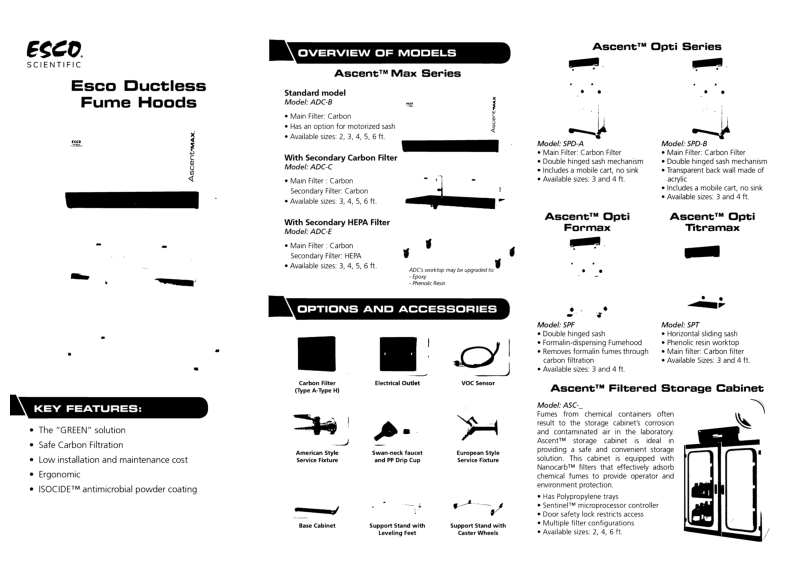

In [ ]:
image_path = '/content/9010406_DUCTLESS Fumehood_Product_Tri-fold brochure_A4_vB_LR-2_page-0001.jpg'
output_path = '/content/procesing_image.jpg'

def preprocess_image_for_ocr(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
    image = cv2.GaussianBlur(image, (5, 5), 0)
    _, image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    kernel = np.ones((1, 1), np.uint8)
    image = cv2.erode(image, kernel, iterations=1)
    image = cv2.dilate(image, kernel, iterations=1)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))

    return image

def display_image(image):
    plt.figure(figsize=(10, 10))
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.show()

def save_preprocessed_image(image, output_path):
    cv2.imwrite(output_path, image)
    print(f'Gambar telah disimpan di: {output_path}')

processed_image = preprocess_image_for_ocr(image_path)
save_preprocessed_image(processed_image, output_path)
display_image(processed_image)


### **Generate Easy-OCR**

**Brosur tripleks (plywood)**



Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

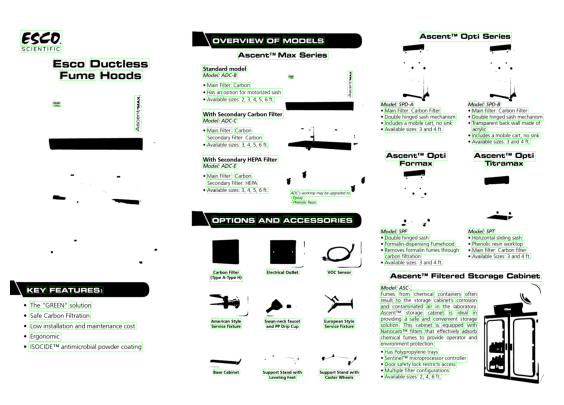

Hasil deteksi disimpan di: /content/extracted_teks.txt


In [ ]:
image_path = '/content/procesing_image.jpg'
output_file_path = '/content/extracted_teks.txt'

def detect_text_in_parts(image_path):
    reader = easyocr.Reader(['en'])
    image = cv2.imread(image_path)
    height, width = image.shape[:2]

    part_width = width // 3
    extracted_texts = []
    with open(output_file_path, 'w') as f:

        for i in range(3):
            start_x = i * part_width
            end_x = (i + 1) * part_width
            part_image = image[:, start_x:end_x]
            results = reader.readtext(part_image)

            for (bbox, text, prob) in results:
                top_left = (start_x + int(bbox[0][0]), int(bbox[0][1]))
                bottom_right = (start_x + int(bbox[2][0]), int(bbox[2][1]))
                cv2.rectangle(image, top_left, bottom_right, (0, 255, 0), 2)
                cv2.putText(image, text, (top_left[0], top_left[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)

                f.write(f"{text}\n")
                extracted_texts.append(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

    print(f"Hasil deteksi disimpan di: {output_file_path}")
    return extracted_texts

extracted_texts = detect_text_in_parts(image_path)



**Document one scaning**

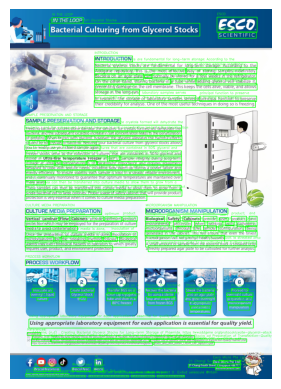

Hasil deteksi disimpan di: /content/extracted.txt


In [ ]:
reader = easyocr.Reader(['en'])

image_path = '/content/9010467_Bacterial Culturing from Glycerol Stocks_InTheLoop_LR_page-0001.jpg'
output_file_path = '/content/extracted.txt'
image = cv2.imread(image_path)
results = reader.readtext(image)
extracted_texts = []


with open(output_file_path, 'w') as f:
    for (bbox, text, prob) in results:
        top_left = tuple(map(int, bbox[0]))
        bottom_right = tuple(map(int, bbox[2]))
        cv2.rectangle(image, top_left, bottom_right, (0, 255, 0), 2)
        cv2.putText(image, text, (top_left[0], top_left[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)
        #print(text)

        f.write(f"{text}\n")

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
print(f"Hasil deteksi disimpan di: {output_file_path}")
full_text = " ".join(extracted_texts)

In [ ]:
!pip install pyspellchecker
clear_output()

## **Data Clening**

In [ ]:
import re
from spellchecker import SpellChecker

In [ ]:
def clean_text(text):
  cleaned_text = re.sub(r'[^A-Za-z0-9\s]', '', text)
  cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip()
  return cleaned_text

def fix_line_breaks(text):
  fixed_text = re.sub(r'(\w+)-\n(\w+)', r'\1\2', text)
  fixed_text = re.sub(r'\n+', ' ', fixed_text)
  return fixed_text

def remove_duplicates(text):
  sentences = text.split('.')
  unique_sentences = []
  for sentence in sentences:
    sentence = sentence.strip()
    if sentence not in unique_sentences:
      unique_sentences.append(sentence)
  return '. '.join(unique_sentences) + '.'

def correct_spelling(text):
    words = text.split()
    corrected_words = [spell.correction(word) if spell.correction(word) else word for word in words]
    return ' '.join(corrected_words)

In [ ]:
def process_ocr_text(text):
    text = clean_text(text)
    text = fix_line_breaks(text)
    text = remove_duplicates(text)
    text = correct_spelling(text)
    return text

In [ ]:
final_text = " ".join(extracted_texts)


In [ ]:
final_data = "".join(data_asli.splitlines())
final_data

'ESCo SCIENTIFIC EscoDuctlessFume HoodsKEY FEATURES:The GREEN solutionSafe Carbon FiltrationLow installation and maintenance costErgonomicISOCIDETM antimicrobial powder coatingOVERVIEW OF MODELSAscentTM Max SeriesStandard modelModel: ADC-BMain Filter: CarbonHas an option for motorized sashAvailable sizes: 2, 3, 4, 5, 6 ft.With Secondary Carbon FilterModel: ADC-CMain Filter : CarbonSecondary Filter: CarbonAvailable sizes: 3, 4, 5, 6 ft.With Secondary HEPA Filter Model: ADC-EMain Filter : CarbonSecondary Filter: HEPAAvailable sizes: 3, 4, 5, 6 ftADC’s worktop may be upgraded to:EpoxyPhenolic ResiOPTIONS AND ACCESSORIESCarbon Filter (Type A-Type H)Electrical OutletVOC SensorAmerican StyleService FixtureSwan-neck faucetand PP Drip CupEuropean StyleService FixtureBase CabinetSupport Stand with Leveling FeetSupport Stand withCaster WheelsAscentTM Opti SeriesModel: SPD-AMain Filter: Carbon FilterDouble hinged sash mechanismIncludes a mobile cart, no sinkAvailable sizes: 3 and 4 ft.Model: SPD-

In [ ]:
len(final_data)

In [ ]:
len(final_text)

## **Cek Index Similarity**

In [ ]:
from IPython.display import clear_output
!pip install python-Levenshtein
!pip install jiwer

clear_output()

In [ ]:
from difflib import SequenceMatcher

def clean_text(text):
    return " ".join(text.split())

def calculate_accuracy(text1, text2):
    text1_clean = clean_text(text1)
    text2_clean = clean_text(text2)


    matcher = SequenceMatcher(None, text1_clean, text2_clean)
    accuracy = matcher.ratio() * 100
    return accuracy

calculate_accuracy(final_data, final_text1)



In [ ]:
import jiwer

def word_error_rate(ocr_text, ground_truth):
    wer = jiwer.wer(ground_truth, ocr_text)
    return wer

word_error_rate(final_text1, final_data)

In [ ]:
import Levenshtein

def calculate_similarity(original_text, ocr_text):
    distance = Levenshtein.distance(original_text, ocr_text)
    max_length = max(len(original_text), len(ocr_text))
    if max_length == 0:
        return 100.0 if original_text == ocr_text else 0.0
    similarity = ((max_length - distance) / max_length) * 100
    return similarity

calculate_similarity(final_data, final_text)


In [ ]:
data_asli= '''

ESCo SCIENTIFIC Esco
Ductless
Fume Hoods
KEY FEATURES:
The GREEN solution
Safe Carbon Filtration
Low installation and maintenance cost
Ergonomic
ISOCIDETM antimicrobial powder coating
OVERVIEW OF MODELS
AscentTM Max Series
Standard model
Model: ADC-B
Main Filter: Carbon
Has an option for motorized sash
Available sizes: 2, 3, 4, 5, 6 ft.
With Secondary Carbon Filter
Model: ADC-C
Main Filter : Carbon
Secondary Filter: Carbon
Available sizes: 3, 4, 5, 6 ft.
With Secondary HEPA Filter Model: ADC-E
Main Filter : Carbon
Secondary Filter: HEPA
Available sizes: 3, 4, 5, 6 ft
ADC’s worktop may be upgraded to:
Epoxy
Phenolic Resi
OPTIONS AND ACCESSORIES
Carbon Filter (Type A-Type H)
Electrical Outlet
VOC Sensor
American Style
Service Fixture
Swan-neck faucet
and PP Drip Cup
European Style
Service Fixture
Base Cabinet
Support Stand with Leveling Feet
Support Stand with
Caster Wheels

AscentTM Opti Series
Model: SPD-A
Main Filter: Carbon Filter
Double hinged sash mechanism
Includes a mobile cart, no sink
Available sizes: 3 and 4 ft.
Model: SPD-B
Main Filter: Carbon Filter
Double hinged sash mechanism
Transparent back wall made of acrylic
Includes a mobile cart, no sink
Available sizes: 3 and 4 ft
AscentTM Opti Formax
Model: SPF
Double hinged sash
Formalin-dispensing Fumehood
Removes formalin fumes through carbon filtration
Available sizes: 3 and 4 ft.
AscentTM Opti Titramax
Model: SPT
Horizontal sliding sash
Phenolic resin worktop
Main filter: Carbon filter
Available Sizes: 3 and 4 ft

AscentTM Filtered Storage Cabinet
Model: ASC-_ Fumes from chemical containers often
result to the storage cabinet’s corrosion
and contaminated air in the laboratory.
AscentTM storage cabinet is ideal in
providing a safe and convenient storage
solution. This cabinet is equipped with
NanocarbTM filters that effectively adsorb
chemical fumes to provide operator and
environment protection.
Has Polypropylene trays
SentinelTM microprocessor controller
Door safety lock restricts access
Multiple filter configurations
Available sizes: 2, 4, 6 ft

'''

# **OCR - GEN AI**

### **Install Library**

In [ ]:
!pip install transformers
clear_output()

### **Import Library**

In [ ]:
import cv2
import matplotlib.pyplot as plt
from transformers import pipeline
import os

ModuleNotFoundError: No module named 'easyocr'

### **Hasil OCR to Gen AI**

In [ ]:
# full_text = " ".join(extracted_texts)
# prompt = "Revise and refine the following OCR output to improve clarity, structure, and readability."
# generator = pipeline('text-generation', model='gpt2')
# input_text = f"{prompt} Teks yang terdeteksi: {full_text}"

# input_length = len(input_text)
# max_length = min(1024, input_length + 50)
# generated_output = generator(input_text, max_length=max_length)

# print("Generated Output:")
# for output in generated_output:
#     print(output['generated_text'])

# output_txt_path = "/content/generated_output.txt"

# with open(output_txt_path, 'w', encoding='utf-8') as f:
#     for output in generated_output:
#         f.write(output['generated_text'] + '\n')

# print(f"Hasil teks yang dihasilkan telah disimpan di {output_txt_path}")


In [ ]:
final_text1 = " ".join(extracted_texts)
len(final_text1)

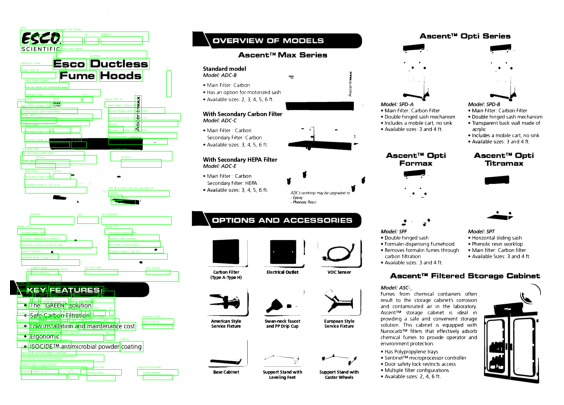

Hasil deteksi disimpan di: /content/extracted_teks.txt
Bullet Points:


In [ ]:
import cv2
import easyocr
import matplotlib.pyplot as plt

image_path = '/content/procesing_image.jpg'
output_file_path = '/content/extracted_teks.txt'

def detect_text_in_parts(image_path):
    reader = easyocr.Reader(['en'])
    image = cv2.imread(image_path)
    height, width = image.shape[:2]
    part_width = width // 3
    extracted_texts = []

    with open(output_file_path, 'w') as f:
        for i in range(3):
            start_x = i * part_width
            end_x = (i + 1) * part_width
            part_image = image[:, start_x:end_x]
            results = reader.readtext(part_image)

            for (bbox, text, prob) in results:
                extracted_texts.append((text, bbox))

    extracted_texts.sort(key=lambda x: (min([point[1] for point in x[1]]), min([point[0] for point in x[1]])))
    bullet_points = []

    with open(output_file_path, 'w') as f:
        for text, bbox in extracted_texts:
            top_left = (int(bbox[0][0]), int(bbox[0][1]))
            bottom_right = (int(bbox[2][0]), int(bbox[2][1]))

            cv2.rectangle(image, top_left, bottom_right, (0, 255, 0), 2)
            cv2.putText(image, text, (top_left[0], top_left[1] - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)
            f.write(f"{text}\n")
            if is_bullet_point(text):
                bullet_points.append(text)


    plt.figure(figsize=(10, 5))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

    print(f"Hasil deteksi disimpan di: {output_file_path}")
    return bullet_points

def is_bullet_point(text):
    """Fungsi untuk mengecek apakah teks merupakan bullet point."""
    bullet_symbols = ['•', '-', '*', '→']
    return any(text.startswith(symbol) for symbol in bullet_symbols)

bullet_points = detect_text_in_parts(image_path)

print("Bullet Points:")
for bp in bullet_points:
    print(f"- {bp}")
